# PROBLEM STATEMENT
Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df


In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
3 # Loading data
data= pd.read_csv('wine.csv')

In [3]:
# Creating backup for data
df=data.copy()

# DATA EXPLORATION

In [4]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
df.sample()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
26,1,13.39,1.77,2.62,16.1,93,2.85,2.94,0.34,1.45,4.8,0.92,3.22,1195


In [7]:
df.shape

(178, 14)

In [8]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
df.info

<bound method DataFrame.info of      Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids 

In [10]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [11]:
df.duplicated().sum() # there is no duplicate value

0

In [12]:
df.isnull().sum() # There is no missing value in data

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [13]:
df.nunique()

Type                 3
Alcohol            126
Malic              133
Ash                 79
Alcalinity          63
Magnesium           53
Phenols             97
Flavanoids         132
Nonflavanoids       39
Proanthocyanins    101
Color              132
Hue                 78
Dilution           122
Proline            121
dtype: int64

In [14]:
df['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

# FEATURE ENGINEERING

In [15]:
data['ID'] = range(1, 179, 1)
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,4
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,5


# FEATURE SCALING

In [16]:
from sklearn.preprocessing import StandardScaler

X = data.drop('Type', axis=1)

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled


array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  1.84791957,
         1.01300893, -1.72234737],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  1.1134493 ,
         0.96524152, -1.70288581],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.78858745,
         1.39514818, -1.68342426],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.48544548,
         0.28057537,  1.68342426],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.40069891,
         0.29649784,  1.70288581],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.42894777,
        -0.59516041,  1.72234737]])

# DIMENTIONALITY REDUCTION (PCA)

In [17]:
from sklearn.decomposition import PCA

pca_model = PCA(n_components=3)

principal_components = pca_model.fit_transform(X_scaled)

In [18]:
pca_model.explained_variance_

array([5.50912479, 2.51112636, 1.46311157])

In [19]:
pca_model.explained_variance_ratio_

array([0.39129819, 0.17835849, 0.10392085])

In [20]:
np.sum(pca_model.explained_variance_ratio_)

0.6735775287678649

In [21]:
from mpl_toolkits import mplot3d

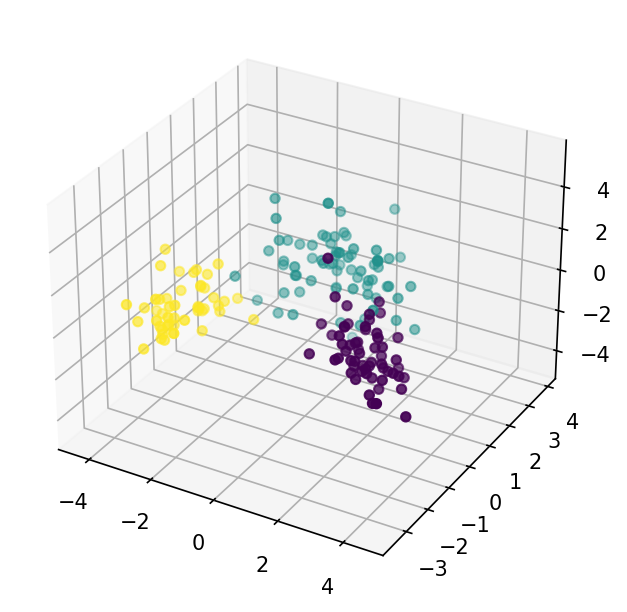

In [22]:
plt.figure(figsize=(5,5),dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(principal_components[:,0],principal_components[:,1],principal_components[:,2],c=data['Type']);


# K-MEANS CLUSTRING

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
ssd = []
silhouette_scores = []

for k in range(2,11):
    
    model = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = model.fit_predict(principal_components)
    
    score = silhouette_score(principal_components, kmeans_labels)
    
    ssd.append(model.inertia_)
    silhouette_scores.append(score)

    
    
    
    # inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=0)
#     kmeans.fit(principal_components)
#     inertia.append(kmeans.inertia_)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

(2.0, 11.0)

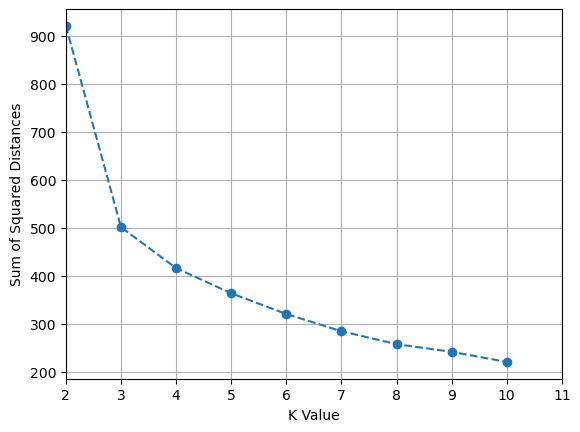

In [26]:
plt.plot(range(2,11),ssd,'o--')
plt.grid()
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')
plt.xlim(2,11)

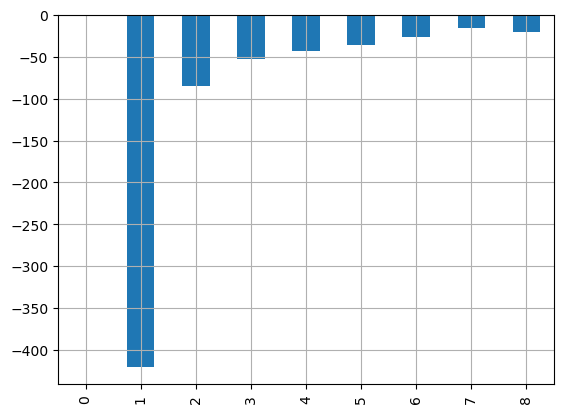

In [27]:
pd.Series(ssd).diff().plot(kind='bar')
plt.grid()

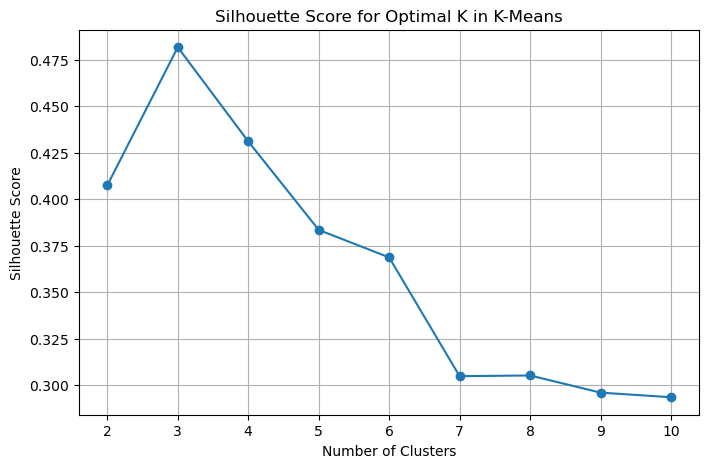

In [28]:
# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K in K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

In [29]:
silhouette_scores

[0.40748327911081,
 0.48178353707242666,
 0.43109240818432953,
 0.38346283871654113,
 0.3686526459127628,
 0.3047325988205188,
 0.30512174566357725,
 0.29588783045757844,
 0.2934090492886087]

In [30]:
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

kmeans = KMeans(n_clusters=optimal_k, random_state=42)

kmeans_labels = kmeans.fit_predict(principal_components)

print("Optimal K value :",optimal_k)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Optimal K value : 3


In [31]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [32]:
data['KMenas Labels'] = kmeans.labels_
data['KMenas Labels'].value_counts()

0    67
2    61
1    50
Name: KMenas Labels, dtype: int64

In [33]:
data.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,KMenas Labels
47,1,13.90,1.68,2.12,16.0,101,3.10,3.39,0.21,2.14,6.1,0.91,3.33,985,48,2
31,1,13.58,1.66,2.36,19.1,106,2.86,3.19,0.22,1.95,6.9,1.09,2.88,1515,32,2
28,1,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.5,1.25,3.40,915,29,2
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.0,0.93,3.69,465,122,0
87,2,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.6,1.36,3.21,562,88,0


In [34]:
data.corr()['KMenas Labels'].sort_values()

Type              -0.509335
ID                -0.502589
Alcalinity        -0.354849
Nonflavanoids     -0.237147
Hue               -0.003238
Malic              0.054149
Dilution           0.193010
Proanthocyanins    0.218225
Ash                0.329584
Flavanoids         0.356494
Phenols            0.380765
Magnesium          0.431290
Color              0.451626
Alcohol            0.768998
Proline            0.805588
KMenas Labels      1.000000
Name: KMenas Labels, dtype: float64

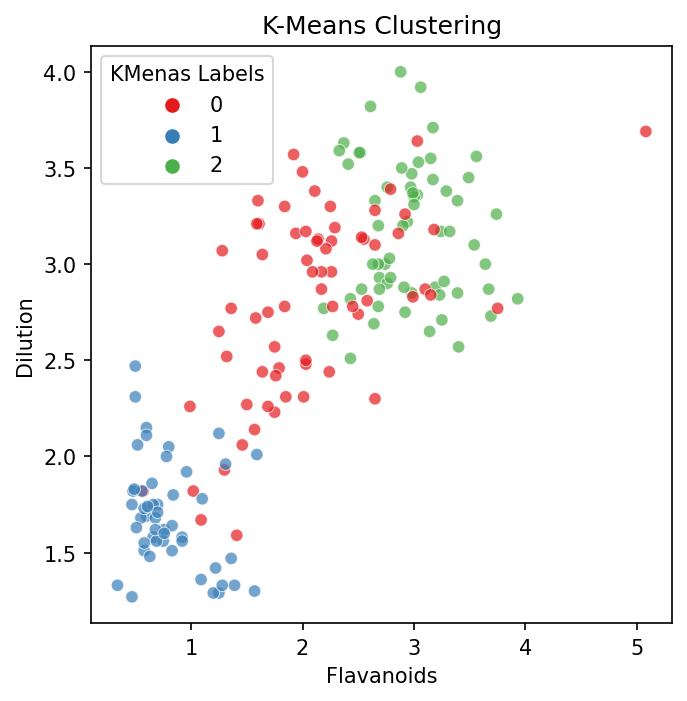

In [35]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(data=data, x='Flavanoids', y='Dilution',hue='KMenas Labels',palette='Set1',alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Flavanoids')
plt.ylabel('Dilution');


# HIERARCHICAL CLUSTRING

In [36]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [37]:
hierarchical_model = AgglomerativeClustering(n_clusters=None,distance_threshold=0)

In [38]:
hierarchy_labels = hierarchical_model.fit_predict(principal_components)

In [39]:
hierarchy_labels

array([160,  96, 133, 134,  89, 167, 124, 171, 161, 162, 140, 125, 141,
       143, 117, 139, 153, 149,  66,  69, 145,  92, 159, 177, 118, 121,
       109,  90, 105,  99, 146, 164, 136, 100,  88, 131, 114, 175, 107,
       154, 166, 111, 120, 155, 102, 113, 157, 108, 156, 119, 101, 158,
       144, 135, 151, 123,  58,  95, 130, 103,  56,  71, 147, 127, 169,
        93, 163, 128,  67, 137, 173, 112, 138,  94,  44, 168,  79, 106,
        91, 142,  52, 150,  77,  70,  72,  59,  34, 152, 110,  63,  46,
       148, 132,  83,  75, 172,  97, 122, 165,  61, 170, 126,  82,  60,
        73,  65,  76,  62,  81,  53,  49,  29,  55,  54, 174, 176,  98,
       104,  32,  45, 116,  27,  48,  22,  80,  39,  74,  87,  51,  85,
        36,  40,  50,  37, 115,  43, 129,  24,  64,  84,  68,  41,  21,
        25,  78,  86,  35,  31,  30,  38,  19,  17,  26,  42,  20,  33,
        47,  16,  14,  23,  57,   9,  18,  15,   8,   7,  10,   3,  28,
         4,   1,  11,  13,   6,  12,   5,   2,   0], dtype=int64

In [40]:
linkage_matrix =  hierarchy.linkage(hierarchical_model.children_)

In [41]:
linkage_matrix

array([[151.        , 157.        ,   1.41421356,   2.        ],
       [174.        , 175.        ,   1.41421356,   2.        ],
       [176.        , 178.        ,   1.41421356,   3.        ],
       [ 11.        ,  23.        ,   2.23606798,   2.        ],
       [ 29.        ,  45.        ,   2.23606798,   2.        ],
       [  5.        ,  39.        ,   2.23606798,   2.        ],
       [103.        , 126.        ,   2.23606798,   2.        ],
       [159.        , 160.        ,   2.23606798,   2.        ],
       [162.        , 163.        ,   2.23606798,   2.        ],
       [ 14.        ,  25.        ,   2.82842712,   2.        ],
       [  4.        ,  48.        ,   2.82842712,   2.        ],
       [141.        , 149.        ,   2.82842712,   2.        ],
       [111.        , 132.        ,   2.82842712,   2.        ],
       [  2.        , 187.        ,   3.16227766,   3.        ],
       [ 18.        , 190.        ,   3.16227766,   4.        ],
       [106.        , 119

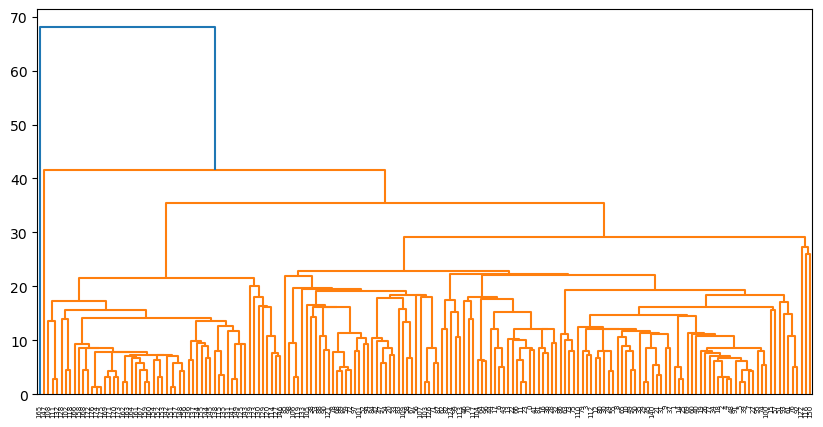

In [42]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix)


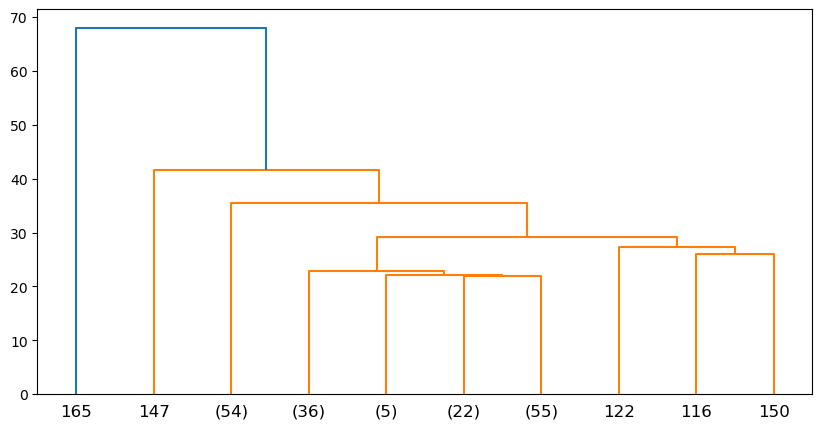

In [43]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='lastp',p=10)

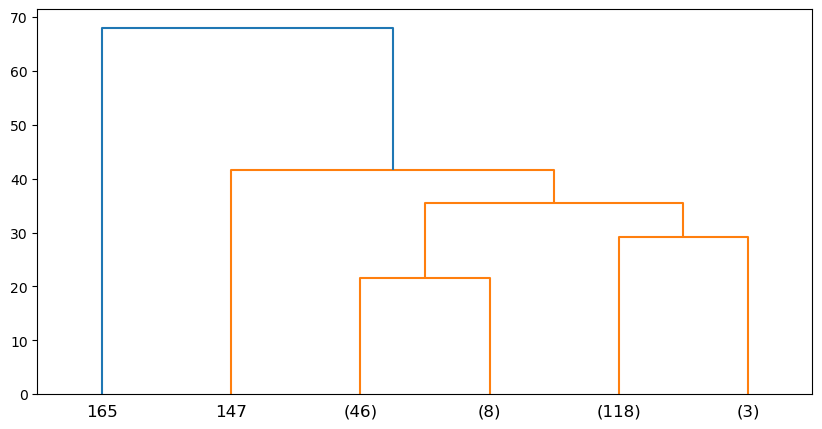

In [44]:
plt.figure(figsize=(10,5))
dendro = dendrogram(linkage_matrix,truncate_mode='level',p=3)

In [45]:
# Calculate linkage matrix
linked = linkage(principal_components, method='ward')

In [46]:
# Initialize an array to store the SSD for different numbers of clusters
ssd = []

# Iterate through different numbers of clusters
for k in range(1, 11):  # You can adjust the range as needed
    # Perform hierarchical clustering and assign labels
    labels = fcluster(linked, k, criterion='maxclust')
    
    # Calculate the centroids of each cluster
    centroids = [data[labels == i].mean(axis=0) for i in range(1, k + 1)]
    
    # Calculate the SSD
    cluster_ssd = sum(((data[labels == i] - centroids[i - 1]) ** 2).sum() for i in range(1, k + 1))
    ssd.append(cluster_ssd)

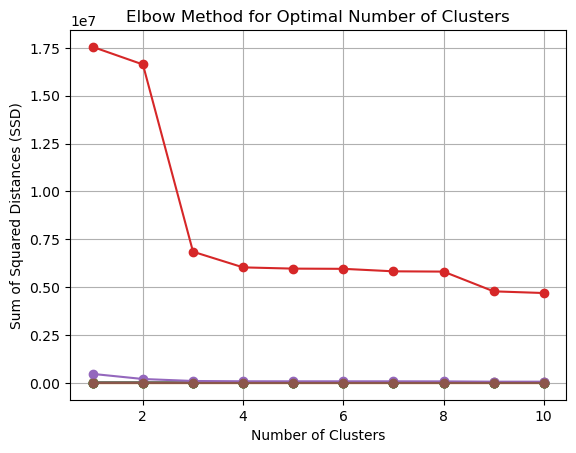

In [47]:
# Plot the SSD versus the number of clusters
plt.plot(range(1, 11), ssd, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.grid(True)
plt.show()

The elbow method suggests that the data is best represented by three clusters.

In [48]:
hierarchical_model = AgglomerativeClustering(n_clusters=3)

In [49]:
hierarchy_labels = hierarchical_model.fit_predict(principal_components)
hierarchy_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [50]:
data['Hierarchical Labels'] = hierarchical_model.labels_
data['Hierarchical Labels'].value_counts()

0    81
2    50
1    47
Name: Hierarchical Labels, dtype: int64

In [51]:
data.sample(5)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,ID,KMenas Labels,Hierarchical Labels
72,2,13.49,1.66,2.24,24.0,87,1.88,1.84,0.27,1.03,3.74,0.98,2.78,472,73,0,0
42,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095,43,2,2
156,3,13.84,4.12,2.38,19.5,89,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480,157,1,1
32,1,13.68,1.83,2.36,17.2,104,2.42,2.69,0.42,1.97,3.84,1.23,2.87,990,33,2,0
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325,112,0,0


In [52]:
data.drop('KMenas Labels',axis=1).corr()['Hierarchical Labels'].sort_values()

ID                    -0.374139
Type                  -0.371374
Alcalinity            -0.327666
Nonflavanoids         -0.178513
Hue                   -0.058246
Malic                  0.087332
Dilution               0.112811
Proanthocyanins        0.221208
Flavanoids             0.289041
Phenols                0.327046
Ash                    0.329836
Magnesium              0.388340
Color                  0.528873
Proline                0.712297
Alcohol                0.743271
Hierarchical Labels    1.000000
Name: Hierarchical Labels, dtype: float64

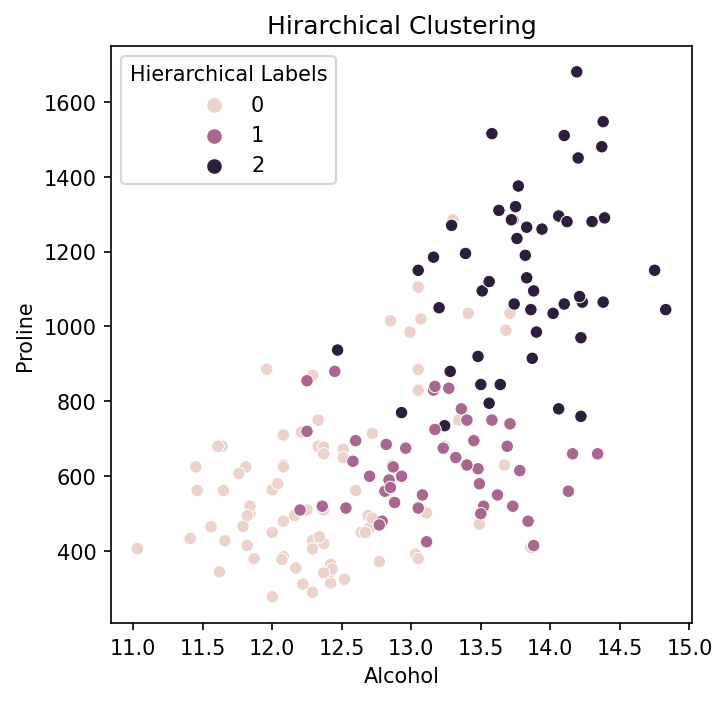

In [53]:
plt.figure(figsize=(5,5),dpi=150)
sns.scatterplot(data=data, x='Alcohol', y='Proline',hue='Hierarchical Labels')
plt.title('Hirarchical Clustering')
plt.xlabel('Alcohol')
plt.ylabel('Proline');

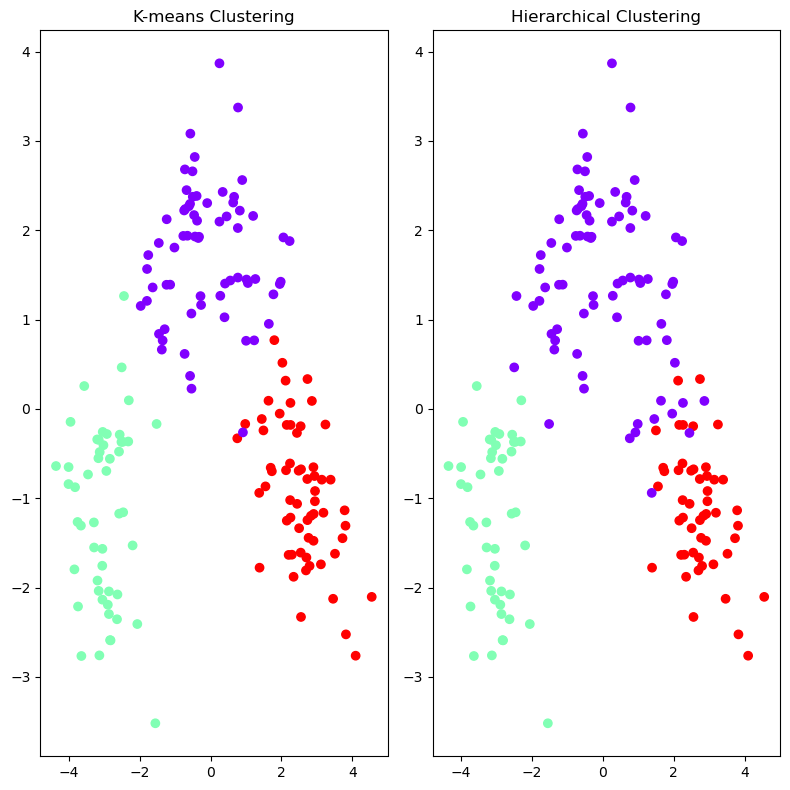

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(8, 8))

# Plot the first scatterplot
axes[0].scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans_labels, cmap='rainbow')
axes[0].set_title('K-means Clustering')

# Plot the second scatterplot
axes[1].scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchy_labels, cmap='rainbow')
axes[1].set_title('Hierarchical Clustering')

# Adjust the layout of the subplots
plt.tight_layout()

# Show the plot
plt.show()

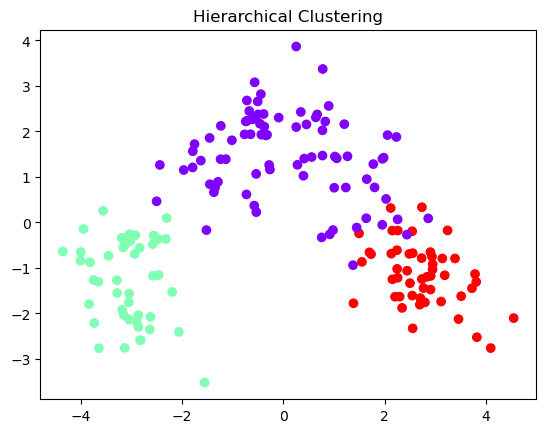

In [55]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=hierarchy_labels, cmap='rainbow')
plt.title('Hierarchical Clustering')
plt.show()